Importing libraries and assign the dataset into variable df. Then prints out df to ensure that the file was loaded correctly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from joblib import dump
import joblib
df= pd.read_csv("loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# 1. Data Exploration

Check the shape of the data. Tells how many rows of data and how many features it has.

In [2]:
df.shape    

(45000, 14)

df.info() to see any missing data, data types of columns which helps ensure no missing values are present and allow for appropriate functions done to features based on datatype. We can see that there are no missing values in our dataset. We can also see that all columns are numeric so no data encoding or parsing needs to be done. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

df.describe to see if there are any values that are incorrect.

In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


add the parameter include='object' to see information about all categorical features. We can now see that we can do OHE when setting up our data for our model.

In [5]:
df.describe(include='object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


With this, we can deduce that there is no errors within the dataset and no data cleaning needs to be done.

In [6]:
print(df.isnull().sum())


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [7]:
print("Number of duplicates:",df.duplicated().sum())

Number of duplicates: 0


SUMMARY:

Shape of the dataset: (45,000, 14) - The dataset contains 45,000 records and 14 columns.

Columns and Data Types:

float64: person_age, person_income, loan_amnt, loan_int_rate, loan_percent_income, cb_person_cred_hist_length
int64: person_emp_exp, credit_score, loan_status
object: person_gender, person_education, person_home_ownership, loan_intent, previous_loan_defaults_on_file

Our goal for the model is to predict loan_status. Whether a person would qualify for a loan.

Statistical Summary:

The person_age ranges from 20 to 144, which includes potential outliers (age > 100).

person_income has a mean of approximately 80,319 but also shows a high maximum value (7,200,766), indicating possible income outliers.

loan_amnt has a median of 8,000, with a max value of 35,000.

credit_score has a range from 390 to 850, which is typical for credit scores.

loan_status shows a mean of 0.22, this indicates that out of 45,000 records, only 22% is approved.

Data health:
The dataset has no missing and duplicated values.

In [8]:
print("\nUnique Values in Each Column:")
print(df.nunique())
# this will show the number of unique values in each column, which can help identify categorical features.


Unique Values in Each Column:
person_age                           60
person_gender                         2
person_education                      5
person_income                     33989
person_emp_exp                       63
person_home_ownership                 4
loan_amnt                          4483
loan_intent                           6
loan_int_rate                      1302
loan_percent_income                  64
cb_person_cred_hist_length           29
credit_score                        340
previous_loan_defaults_on_file        2
loan_status                           2
dtype: int64


In [9]:
# seperates numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

#shows the numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [10]:
# displays unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']


We can see that the numerical and categorical features are:

Numerical Columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

Categorical Columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

For categorical columns, we can see that the unique values are:

Column: person_gender
Unique Values: ['female' 'male']

Column: person_education
Unique Values: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Column: person_home_ownership
Unique Values: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Column: loan_intent
Unique Values: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Column: previous_loan_defaults_on_file
Unique Values: ['No' 'Yes']



We will now be visualising the data.

Index([0, 1], dtype='int64', name='loan_status')


C:\Users\benna\AppData\Local\Temp\ipykernel_30996\3785000966.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')


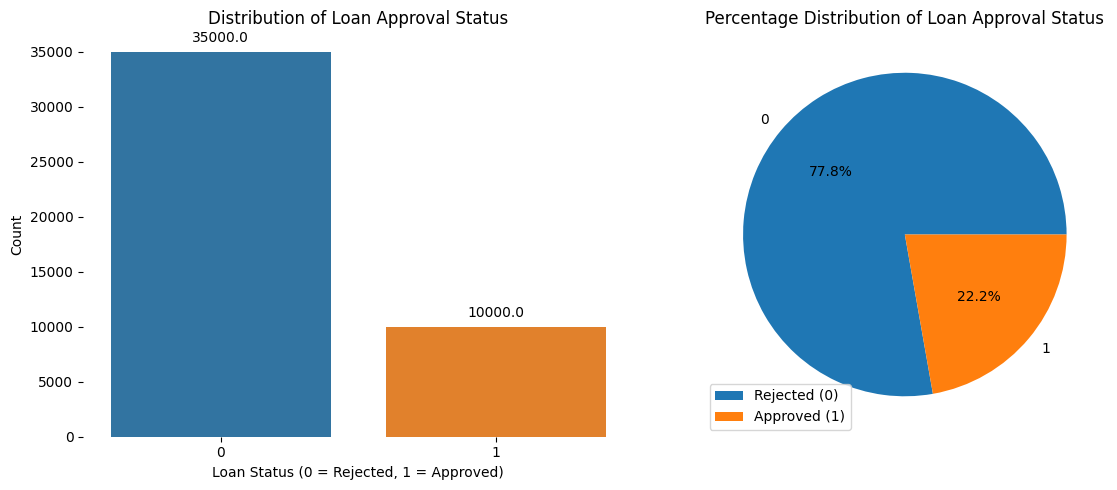

In [11]:
# Create subplots for loan status visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count the occurrences of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Bar plot for loan status distribution
sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
print(loan_status_counts.index )
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

# Annotate bar plot with counts 
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', 
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Pie chart for percentage distribution of loan status
loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%', 
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

From the visualisations above, we can see that there are a higher amount of individuals who were rejected for their loan compared to those that were accepted. This is important as we can take into the class imbalance when building the predictive models.

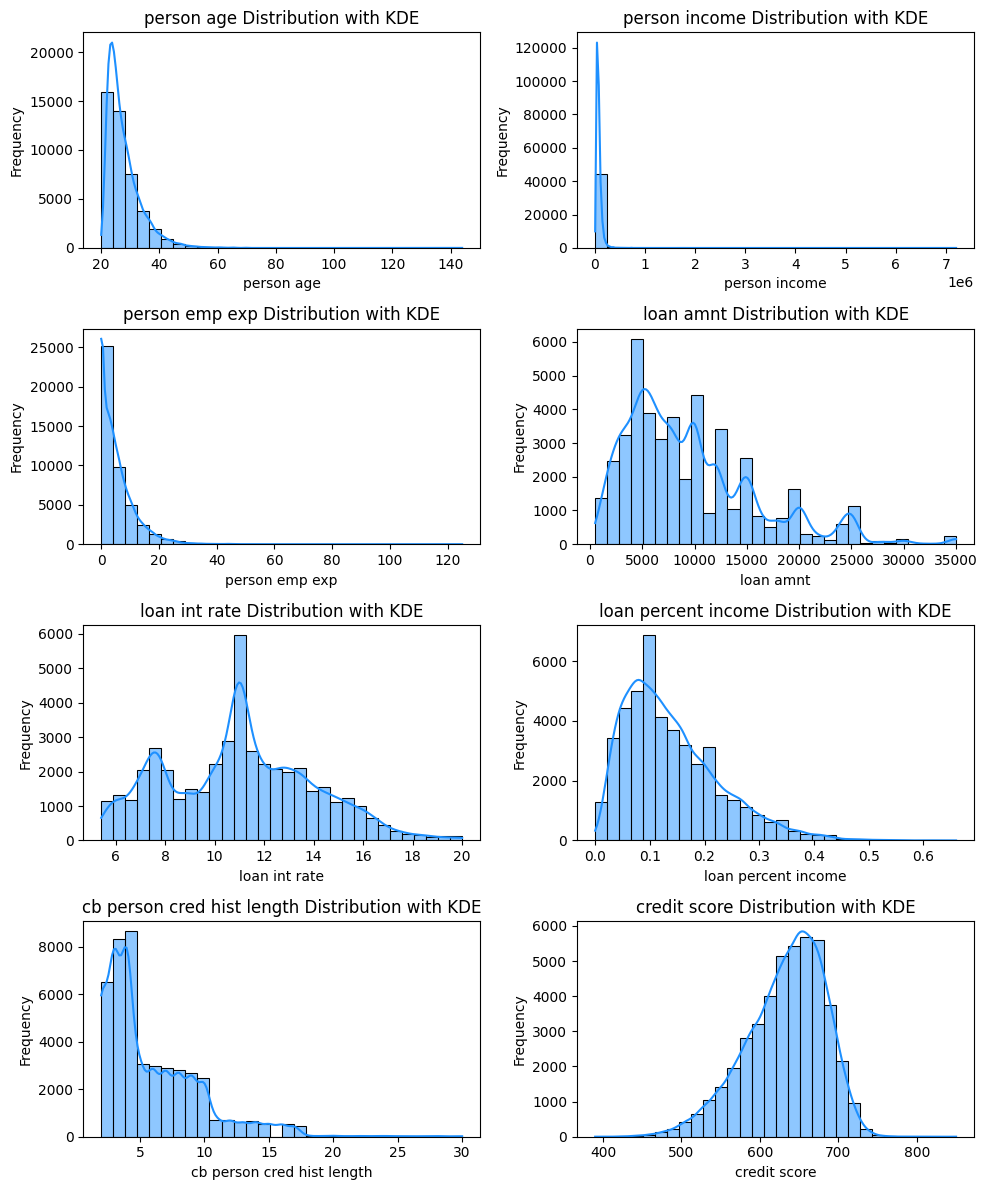

In [12]:


def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))  
    
    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)  
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

Person Age:

The age distribution is slightly right-skewed, with most individuals in the dataset being between 20 and 40 years old.
The presence of a KDE (Kernel Density Estimate) helps smooth out the distribution, making it easier to visualize common age ranges.

Person Income:

The income distribution is highly right-skewed, with a large portion of incomes clustered at lower values.
Some very high income values are present, indicating potential outliers that could affect model performance if left unaddressed.

Person Employment Experience:

The majority of individuals have fewer than 10 years of experience, with a rapid decline in frequency as years increase.
A few instances show very high values, likely outliers, which could skew the analysis if not addressed.

Loan Amount:

The loan amounts are concentrated at lower values, indicating that most applicants are requesting smaller loans.
The distribution gradually tapers off, with a few applicants requesting high loan amounts.

Loan Interest Rate:

Interest rates are mostly clustered around 10% to 15%, which aligns with typical loan rates.
There’s a notable density between 5% and 10% as well, possibly indicating applicants with lower-risk profiles.

Loan Percent Income:

This distribution shows that most loan amounts are a small percentage of the applicant’s income, often less than 20%.
A few cases have a higher percentage, suggesting higher risk or lower-income applicants relative to their loan amounts.

Credit History Length:

The credit history length peaks at around 3 to 5 years, with fewer individuals having a credit history over 10 years.
This pattern can reflect a younger demographic or individuals newer to credit systems.
Credit Score:

Credit scores are distributed normally around the mid-range (600-700).
The distribution tails off near 850. 

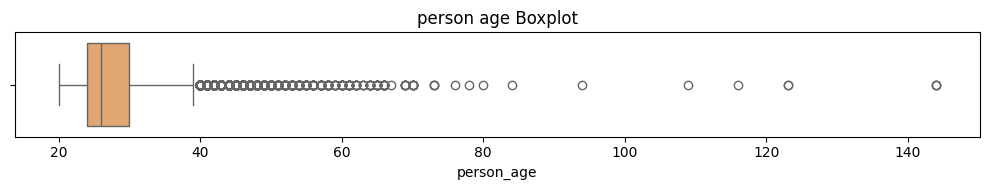


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


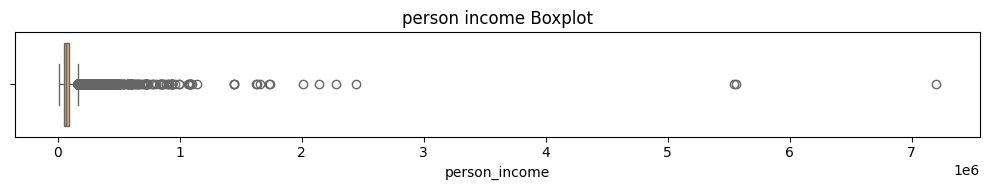


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


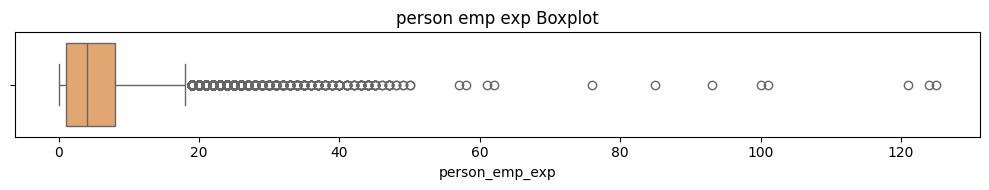


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


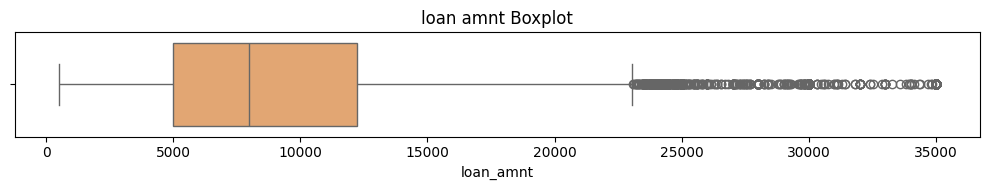


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


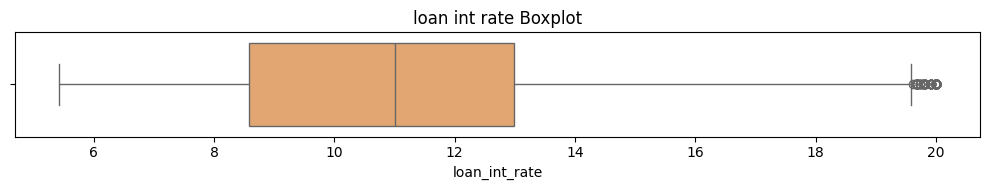


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


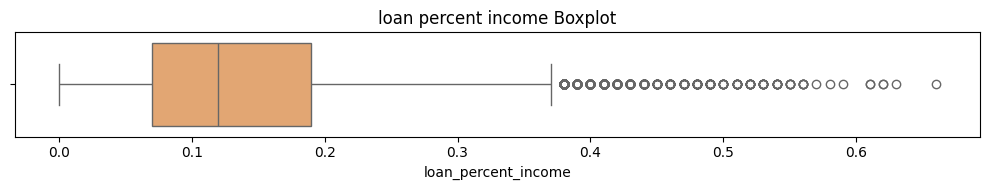


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


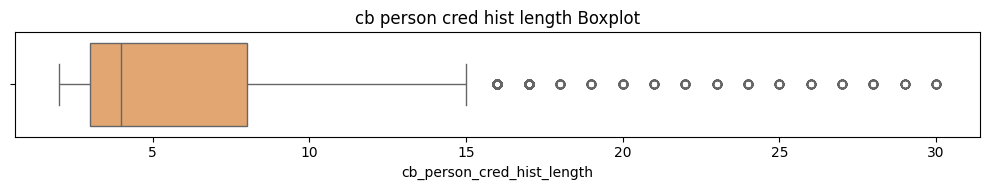


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


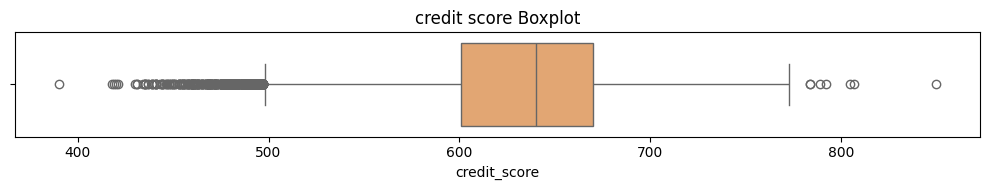


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [13]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))
    
    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')
    
    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

Insights:

Person Age:

Ages range from 20 to 144, with the median age at 26. The high maximum value suggests a few outliers.
The interquartile range (IQR) is fairly narrow, with most values between 24 and 30.
Person Income:

The income distribution has a significant range, from 8,000 to over 7.2 million, with a median around 67,048.
The high maximum value indicates extreme outliers, which could potentially skew analyses and models.

Person Employment Experience:

Most values fall below 10 years, with the median at 4 years.
A maximum of 125 years is unusual, indicating outliers or data anomalies.

Loan Amount:

Loan amounts vary from 500 to 35,000, with a median of 8,000.
The distribution suggests a broad spread, with some applicants requesting higher amounts near the upper limit.

Loan Interest Rate:

Interest rates range from 5.42% to 20%, with a median rate of 11.01%.
Most rates cluster within the IQR (8.59% to 12.99%), which is typical for loan interest rates.
Loan Percent Income:

This metric ranges from 0 to 0.66, with a median of 0.12, suggesting that most loans are less than 20% of the borrower’s income.
The presence of high values near 0.66 may indicate loans that represent a higher financial burden for some applicants.

Credit History Length:

Credit history spans from 2 to 30 years, with a median of 4 years.
Most applicants have shorter credit histories, likely reflecting a younger demographic.

Credit Score:

Credit scores range from 390 to 850, with a median of 640.
The distribution appears fairly symmetric around the mean of 632, with most values falling within columns or address any anomalies.
def plot_categorical_dm

In [14]:
def plot_categorical_distribution(column_name, data=df):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='muted')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

C:\Users\benna\AppData\Local\Temp\ipykernel_30996\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


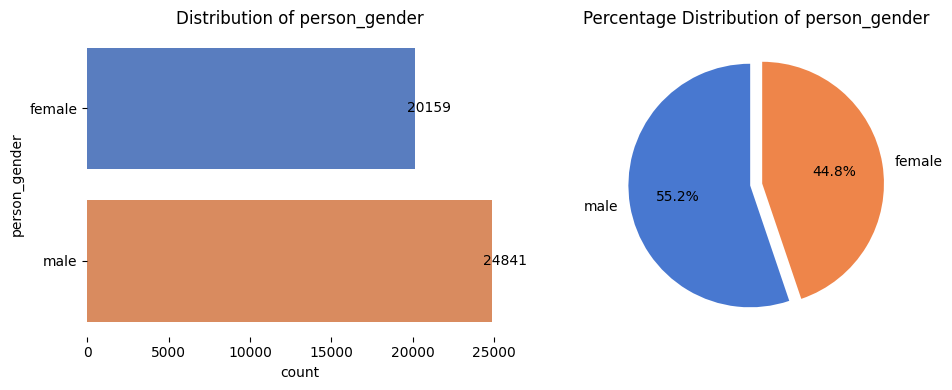

C:\Users\benna\AppData\Local\Temp\ipykernel_30996\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


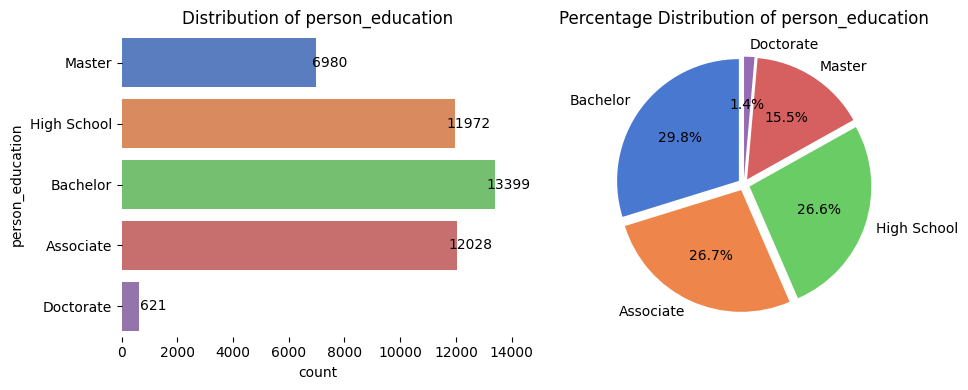

C:\Users\benna\AppData\Local\Temp\ipykernel_30996\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


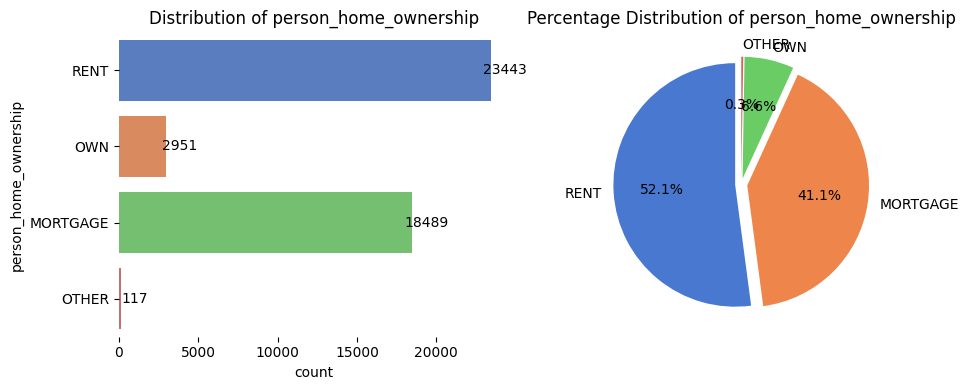

C:\Users\benna\AppData\Local\Temp\ipykernel_30996\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


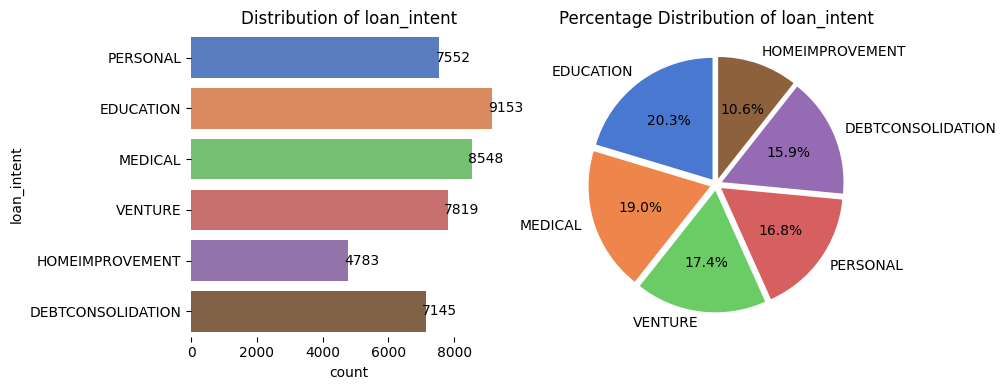

C:\Users\benna\AppData\Local\Temp\ipykernel_30996\1644664565.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=column_name, data=df, palette='muted')


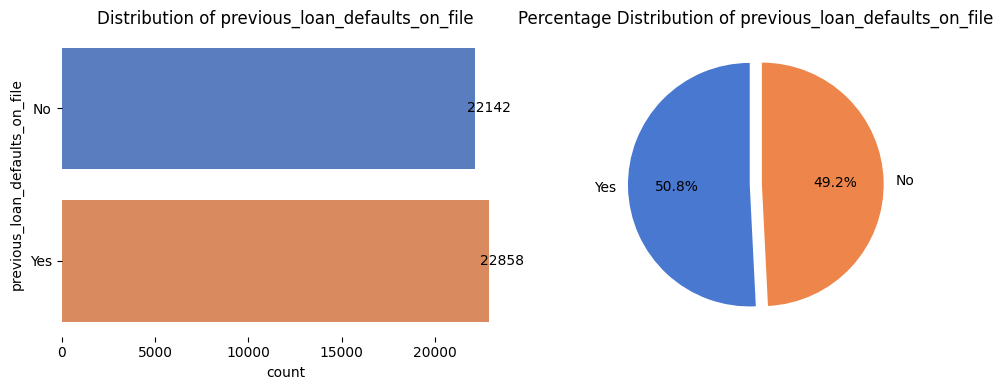

In [15]:
plot_categorical_distribution('person_gender')
plot_categorical_distribution('person_education')
plot_categorical_distribution('person_home_ownership')
plot_categorical_distribution('loan_intent')
plot_categorical_distribution('previous_loan_defaults_on_file')

Insights

Person Gender:
We can observe that there is a faily even distribution of males and females applying for the loans. But skews towards males slightly.

Person Education:
We can observe that the majority of individuals in the data have High School, Associate and Bachelor level of education. While fewer individuals have a Doctorate and Masters education level.
This feature influences the likelihood of the loan being rejected or approved as the education level may have a correlation between the person's income and credit score.

Person Home Ownership:
We can observe that individuals applying for loans a high majority have their homes on rent or mortage. While very few own their houses and individuals with "others" as their home statuses.
This affects the loan acceptability as home ownership usually dictates the person's financial stability.

Loan Intent:
Loan purposes are diverse, with common intents like personal use, debt consolidation, medical expenses, and education.
The distribution reveals common reasons for seeking loans, which may impact loan approval criteria depending on risk.

Previous Loan Defaults on File:
Most applicants have no record of previous loan defaults, though there is a significant portion with defaults.
This feature can strongly influence loan decisions, as past defaults indicate higher risk.




# 2. Data Exploration (Relationships)

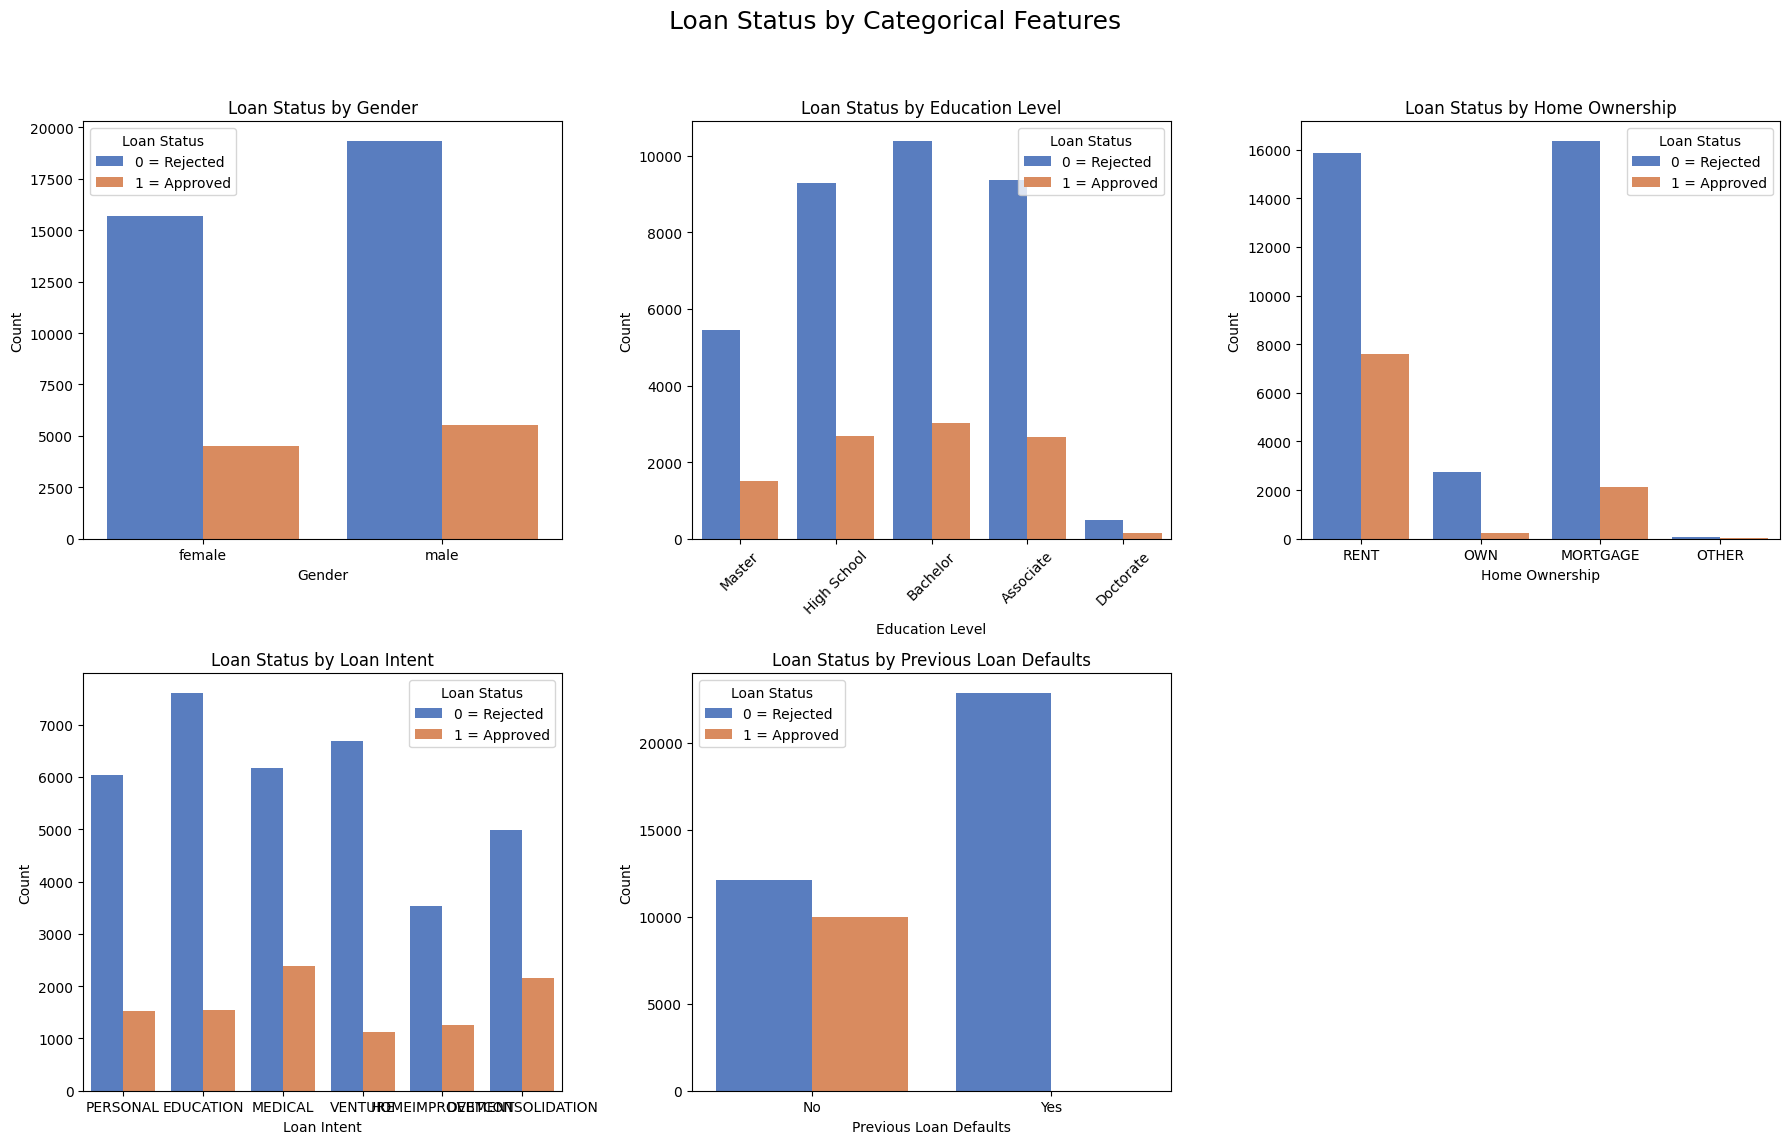

In [16]:
# Create subplots for loan status by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Loan Status by Categorical Features", fontsize=18)

# Visualization for person_gender vs loan_status
sns.countplot(data=df, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("Loan Status by Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")
axes[0, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for person_education vs loan_status
sns.countplot(data=df, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("Loan Status by Education Level")
axes[0, 1].set_xlabel("Education Level")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])
axes[0, 1].tick_params(axis='x', rotation=45)

# Visualization for person_home_ownership vs loan_status
sns.countplot(data=df, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("Loan Status by Home Ownership")
axes[0, 2].set_xlabel("Home Ownership")
axes[0, 2].set_ylabel("Count")
axes[0, 2].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for loan_intent vs loan_status
sns.countplot(data=df, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("Loan Status by Loan Intent")
axes[1, 0].set_xlabel("Loan Intent")
axes[1, 0].set_ylabel("Count")
axes[1, 0].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Visualization for previous_loan_defaults_on_file vs loan_status
sns.countplot(data=df, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("Loan Status by Previous Loan Defaults")
axes[1, 1].set_xlabel("Previous Loan Defaults")
axes[1, 1].set_ylabel("Count")
axes[1, 1].legend(title='Loan Status', labels=['0 = Rejected', '1 = Approved'])

# Hide the last subplot (if not needed)
fig.delaxes(axes[1][2])

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Insights based on the relationship between loan status and various categorical features:

Loan Status by Gender:
Loan approvals and rejections are fairly balanced across genders, though there may be slight variations.
This balance suggests that gender may not be a strong determining factor in loan approval outcomes.


Loan Status by Education Level:
Applicants with higher education levels (Bachelor's, Associate's, etc.) seem to have a higher count of loan approvals compared to those with lower education levels.
Education level could be a predictor of loan approval, as it often correlates with higher income and creditworthiness.

Loan Status by Home Ownership:
Individuals who rent appear to have a higher rate of loan rejections compared to those with mortgages or who own homes.
This trend might indicate that home ownership status is considered a risk factor, as renters may have less financial stability than homeowners.

Loan Status by Loan Intent:
Certain loan purposes, like debt consolidation and personal loans, show more loan rejections than approvals.
Conversely, loan intents for ventures and education appear to have relatively balanced approval and rejection rates, possibly due to the perceived potential for income generation or improvement.

Loan Status by Previous Loan Defaults:
Applicants with a history of previous loan defaults have a significantly higher rejection rate compared to those without defaults.
This feature likely has a strong influence on loan status, as past defaults signal any specific analysis.

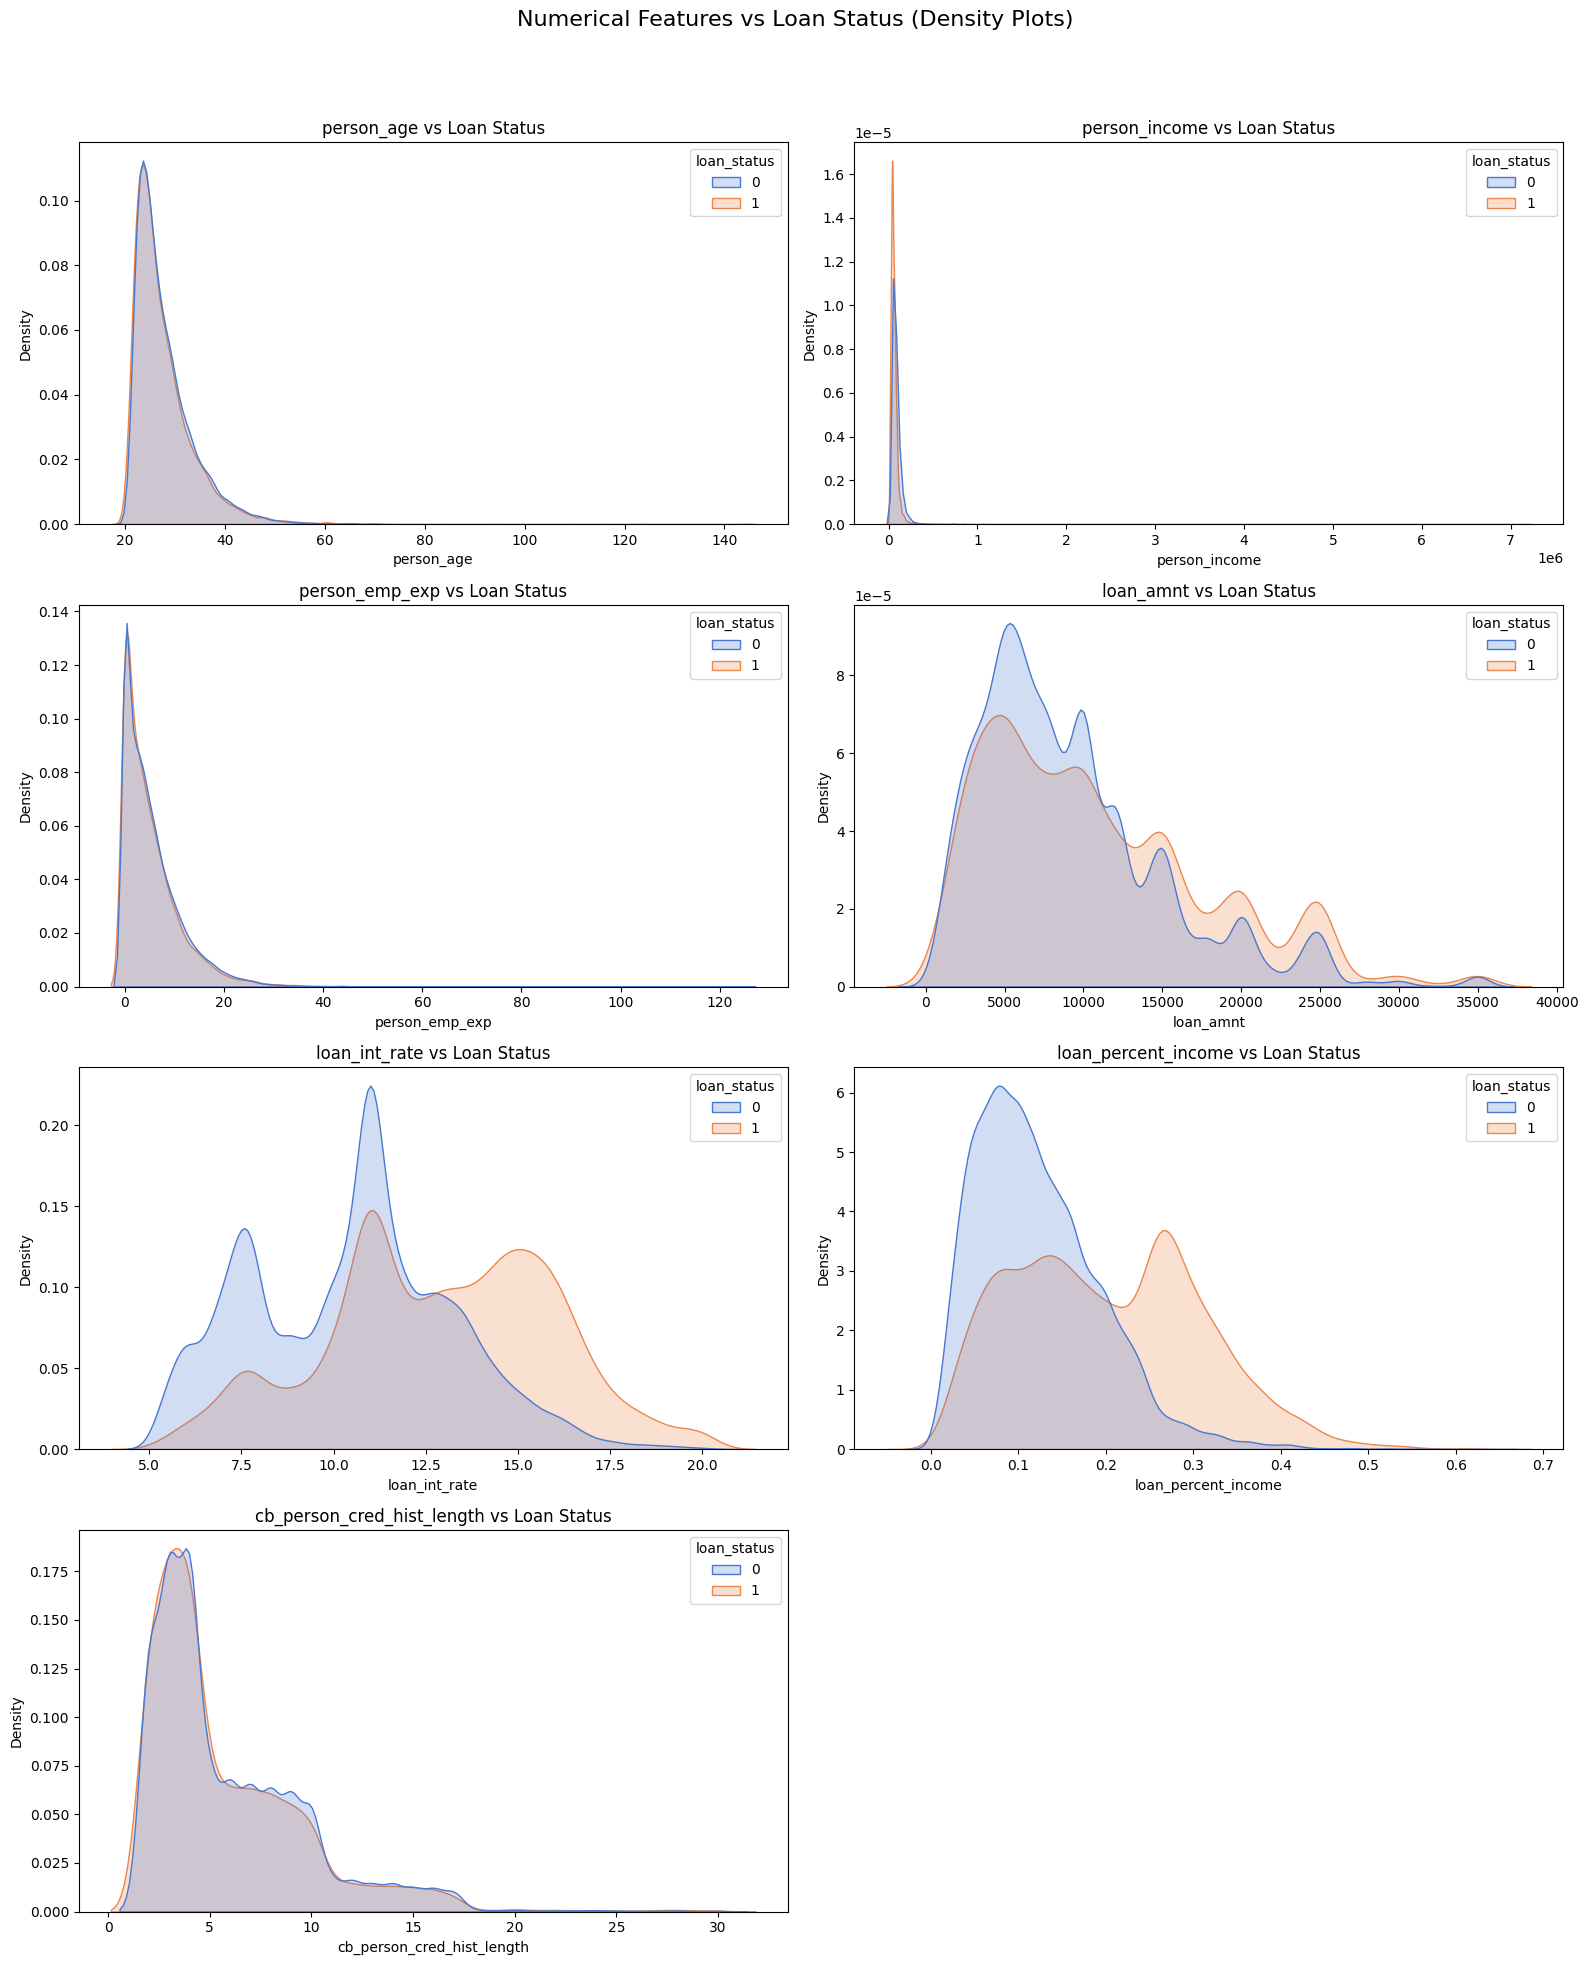

In [17]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
fig.suptitle('Numerical Features vs Loan Status (Density Plots)', fontsize=16)

for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='loan_status', ax=axes[i//2, i%2], fill=True, common_norm=False, palette='muted')
    axes[i//2, i%2].set_title(f'{col} vs Loan Status')
    axes[i//2, i%2].set_xlabel(col)
    axes[i//2, i%2].set_ylabel('Density')

fig.delaxes(axes[3, 1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Insights from the boxplots of numerical features by loan status:

Person Age:
Approved loans tend to have a slightly younger median age, though the difference is subtle.
The distribution range is wider for rejected loans, with outliers at the upper end, possibly indicating higher age as a minor risk factor.

Person Income:
Approved loans generally correspond to applicants with higher incomes.
The median income is notably higher for approved loans, and there are many high-income outliers for approved applications, suggesting that income positively impacts approval.

Person Employment Experience:
Higher employment experience shows a slight correlation with loan approval, as approved applicants have a higher median experience.
However, both approved and rejected groups share a wide range, implying other factors might play a stronger role.

Loan Amount:
Loan amounts are relatively similar across approved and rejected groups, though slightly higher medians are observed in rejected loans.
This may suggest that larger loans are slightly more prone to rejection, but the difference is not substantial.

Loan Interest Rate:
Approved loans tend to have slightly lower interest rates on average compared to rejected loans.
This difference aligns with a higher perceived risk for applicants with higher interest rates, possibly due to lower credit scores.


Loan Percent Income:
Applicants with approved loans generally have lower loan-to-income ratios, indicating that loans making up a smaller percentage of income are more likely to be approved.
High loan-to-income ratios in rejected loans suggest that lenders are cautious when loan amounts represent a significant portion of income.

Credit History Length:
Longer credit histories are observed for approved loans, suggesting that applicants with established credit histories have a higher likelihood of approval.
The trend reflects lenders’ preference for borrowers with more credit experience.

Credit Score:
Approved loans are associated with higher credit scores, as expected.
This significant difference highlights credit score as a strong predictor of loan approval, with higher scores reflecting lower perceived risk.

In [18]:
np.isinf(df[numerical_columns]).sum()

person_age                    0
person_income                 0
person_emp_exp                0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
credit_score                  0
dtype: int64

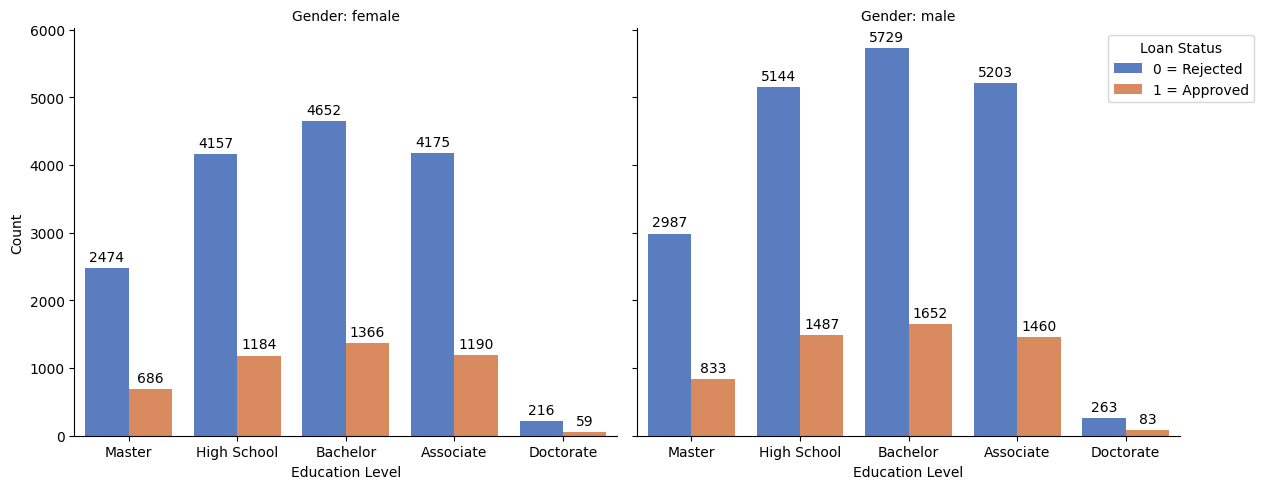

In [19]:
# Create the catplot for person_education vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_education', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Education Level", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for education level vs. loan status by gender:
 
Gender Comparison:

Both male and female applicants show similar trends in loan approval and rejection rates across education levels, though there may be slight variations.
Education Level and Loan Status:

For both genders, applicants with higher education levels (e.g., Bachelor's, Master's) tend to have higher loan approval counts.
Applicants with only a high school education appear to have more rejections than approvals, indicating that education level might influence loan outcomes, likely due to its association with income stability.
Approval Pattern by Gender:

Among both genders, there is a noticeable trend where more educated applicants (e.g., those with Master’s and Bachelor’s degrees) are more likely to get approved, which suggests that education level is a positive indicator for loan approval, possibly reflecting a more stable financial profile.
Rejected Applications:

The rejection rate is higher for applicants with lower educational attainment, which might point to a perceived higher risk by lenders.
These patterns suggest that education level is an influential factor in loan approval decisions, and it interacts similarly across both genders.

C:\Users\benna\AppData\Local\Temp\ipykernel_30996\3638622325.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\benna\AppData\Local\Temp\ipykernel_30996\3638622325.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


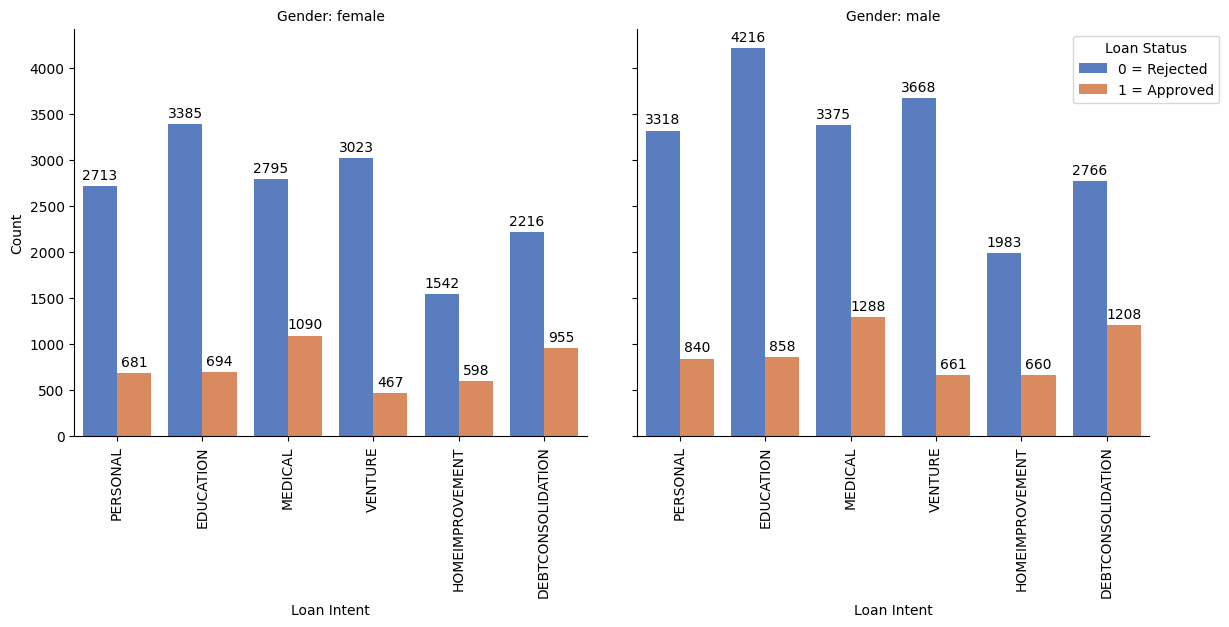

In [20]:
g = sns.catplot(
    data=df,
    x='loan_intent', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Loan Intent", "Count")
g.set_titles("Gender: {col_name}")

# Rotate x-axis labels by 90 degrees
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for education level vs. loan status by gender:

Gender Comparison:

Both male and female applicants show similar trends in loan approval and rejection rates across education levels, though there may be slight variations.
Education Level and Loan Status:

For both genders, applicants with higher education levels (e.g., Bachelor's, Master's) tend to have higher loan approval counts.
Applicants with only a high school education appear to have more rejections than approvals, indicating that education level might influence loan outcomes, likely due to its association with income stability.
Approval Pattern by Gender:

Among both genders, there is a noticeable trend where more educated applicants (e.g., those with Master’s and Bachelor’s degrees) are more likely to get approved, which suggests that education level is a positive indicator for loan approval, possibly reflecting a more stable financial profile.
Rejected Applications:

The rejection rate is higher for applicants with lower educational attainment, which might point to a perceived higher risk by lenders.
These patterns suggest that education level is an influential factor in loan approval decisions, and it interacts similarly across both genders.

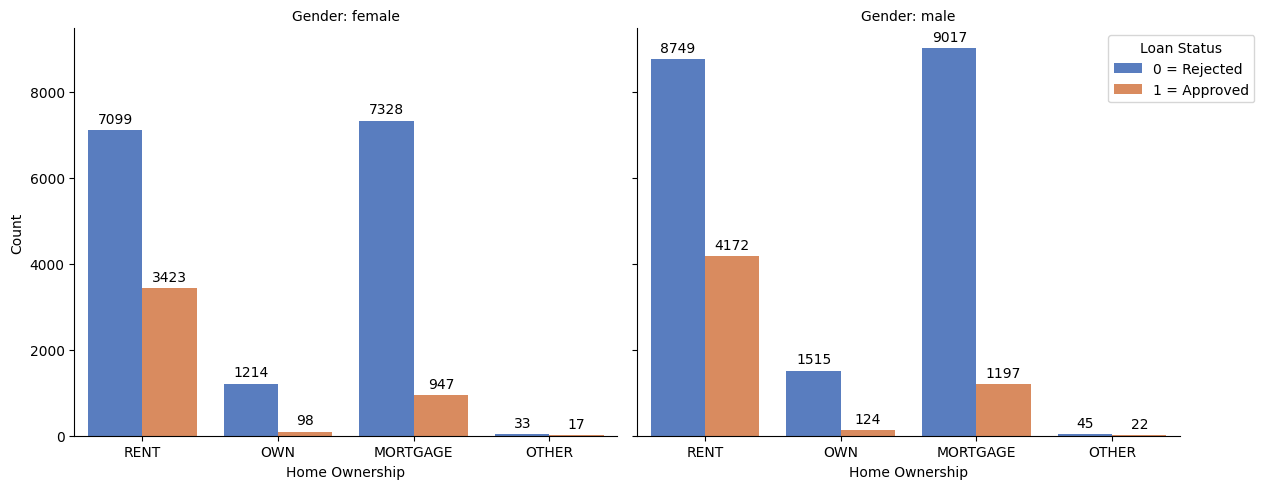

In [21]:
# Create the catplot for person_home_ownership vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='person_home_ownership', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Home Ownership", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for home ownership vs. loan status by gender:


Home Ownership and Loan Status:
Both male and female applicants with a mortgage or who own their home have higher counts of approved loans compared to those who rent or are categorized under “other.”
Renting is associated with a higher rejection rate, possibly indicating that renters may be perceived as having a higher credit risk.

Gender-Specific Patterns:
While both genders show similar trends, males who own homes or have a mortgage appear to have a slightly higher number of loan approvals compared to females with similar homeownership status.
In both genders, applicants under the “other” category have relatively fewer approvals, suggesting that homeownership stability (owning or mortgaging) is a positive factor for loan approval.

Rejected Applications:
Among renters, the rejection rate is notably high across both genders, which could imply that renters might lack certain financial security or creditworthiness that homeowners possess.

Homeownership as a Stability Indicator:
The data suggests that applicants who own or have a mortgage are viewed more favorably, likely due to perceived financial stability, which positively influences loan approval chances.
These observations indicate that homeownership is a significant predictor of loan approval, reflecting the applicant's financial stability, and is consistent across both genders.

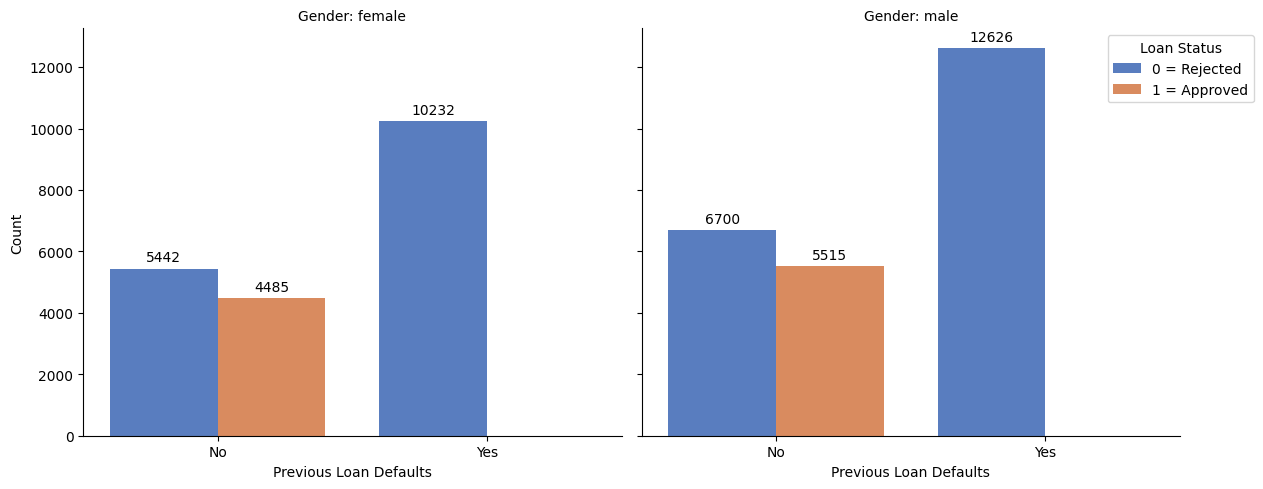

In [22]:
# Create the catplot for previous_loan_defaults_on_file vs loan_status by person_gender
g = sns.catplot(
    data=df,
    x='previous_loan_defaults_on_file', 
    hue='loan_status', 
    col='person_gender',
    kind='count',
    height=5, 
    aspect=1.2,
    palette='muted',
    legend=False
)

# Set axis labels and titles
g.set_axis_labels("Previous Loan Defaults", "Count")
g.set_titles("Gender: {col_name}")

# Annotate bars with counts
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='baseline', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5), 
                    textcoords='offset points')

# Add legend for loan status
plt.legend(
    title="Loan Status",
    loc='upper right', 
    labels=['0 = Rejected', '1 = Approved'],
    bbox_to_anchor=(1.15, 1)
)

# Show the plot
plt.show()

Insights for previous loan defaults vs. loan status by gender:


Impact of Previous Defaults on Loan Approval:
Applicants with previous loan defaults have a significantly higher count of rejections for both genders, indicating that a history of loan defaults is a strong negative factor in loan approval decisions.
Those without previous loan defaults have noticeably more approvals, highlighting that a clean credit history is associated with higher approval rates.

Gender-Specific Observations:
Both male and female applicants with no prior defaults show similar approval and rejection patterns, suggesting that previous defaults affect loan decisions consistently across genders.
Among applicants with previous defaults, the rejection rate is overwhelmingly high for both genders, reinforcing the importance lenders place on a clean credit history.

High Rejection for Defaults:
The high rejection rate for applicants with prior defaults suggests that lenders view these individuals as higher risk, irrespective of other factors, which strongly influences loan status outcomes.
These patterns underscore that previous loan defaults are a crucial factor in loan approval, and maintaining a clear credit record is beneficial for both genders when seeking loan approvals.

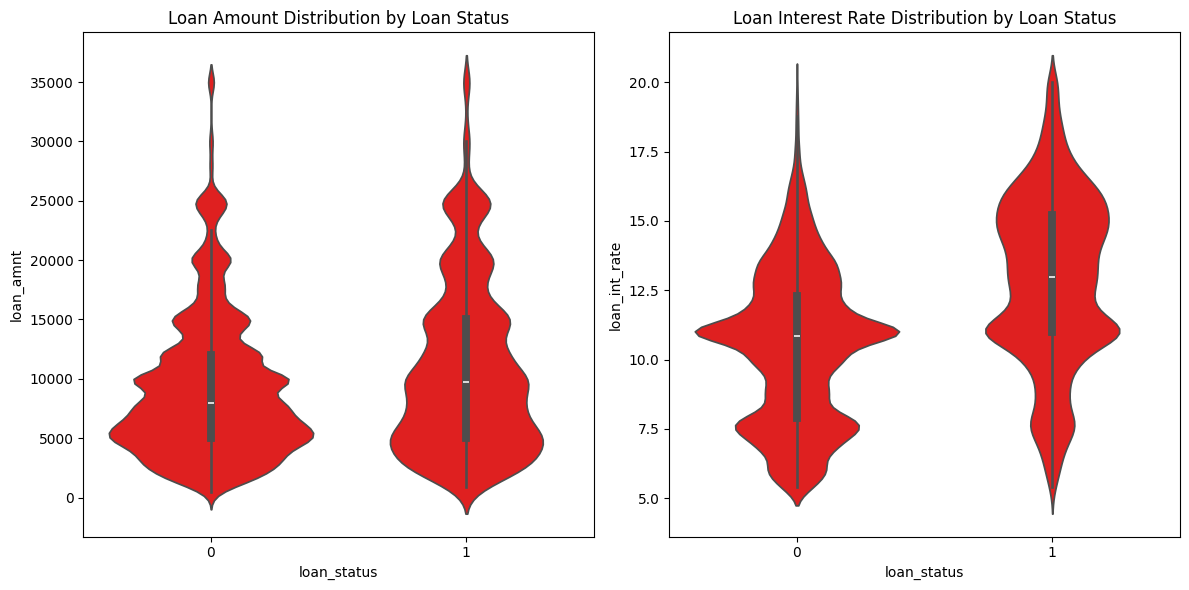

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='loan_status', y='loan_amnt', data=df,color="red")
plt.title('Loan Amount Distribution by Loan Status')

plt.subplot(1, 2, 2)
sns.violinplot(x='loan_status', y='loan_int_rate', data=df,color="red")
plt.title('Loan Interest Rate Distribution by Loan Status')

plt.tight_layout()
plt.show()

Insights for loan amount and loan interest rate by loan status:


Loan Amount Distribution by Loan Status:
The distribution of loan amounts differs between approved and rejected loans.
Approved loans show a broader spread across different loan amounts, with a central tendency around mid-range amounts.
Rejected loans tend to cluster at both low and high loan amounts, indicating that very small or large loan requests are more likely to be rejected.

Loan Interest Rate Distribution by Loan Status:
Loan interest rates are higher for rejected loans, with a central tendency around a higher rate compared to approved loans.
Approved loans have a narrower distribution with lower average interest rates, suggesting that lower-risk (lower-interest) loans have better chances of approval.

# 3. Data Preprocessing

In [24]:
df.shape

(45000, 14)

In [25]:
# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3, 
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


# Display the transformed DataFrame
print(df.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

In [26]:
df.shape

(45000, 20)

The transformation applied to the dataset:

Binary Encoding:

person_gender is now represented as 0 (female) and 1 (male).
previous_loan_defaults_on_file is represented as 0 (No) and 1 (Yes).
Ordinal Encoding:

person_education has been mapped based on the level of education, with higher values indicating higher educational attainment (e.g., High School = 1, Doctorate = 5).
One-Hot Encoding:

New columns have been created for person_home_ownership and loan_intent, each representing a unique category (e.g., person_home_ownership_OWN, loan_intent_PERSONAL), with one category dropped to avoid multicollsformations.

In [27]:
# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

As seen when exploring the data, the maximum age in the dataset is 144, which is definetely an outlier as it defies the human lifespan. To handle this, we replace the outliers where the age is above 100, and replace them with the median age.

In [28]:
# Analyze the 'person_age' column
column = 'person_age'
title = column.replace('_', ' ')

# Display summary statistics for person_age
print(f'\nSummary Statistics for {title}:\n', df[column].describe())


Summary Statistics for person age:
 count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


After replacing outliers with the median age:

The maximum age is now 94, which falls within a reasonable range for human age data.
The mean age (27.75) and standard deviation (5.91) have slightly decreased, suggesting a more compact age distribution.
Replacing extreme values with the median has helped to eliminate unrealistic values without removing any rows, preserving the dataset's integrity.
This approach retains a realistic spread in the person_age data, with the median remaining at 26.

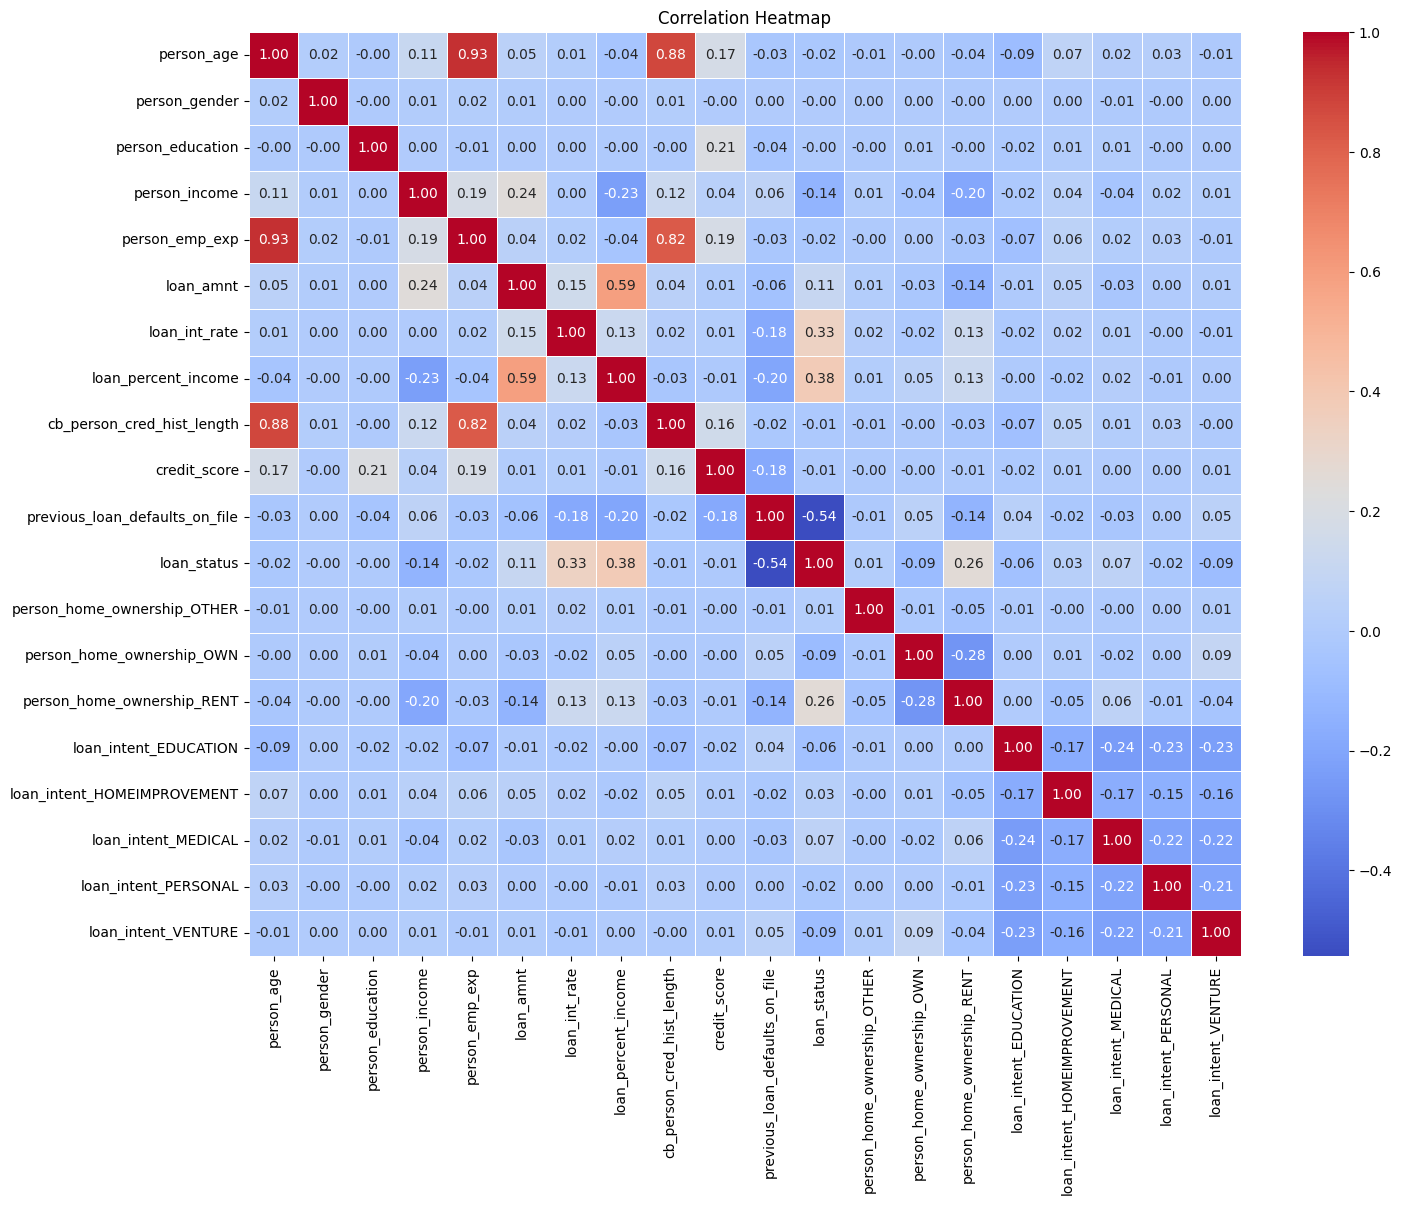

In [29]:
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

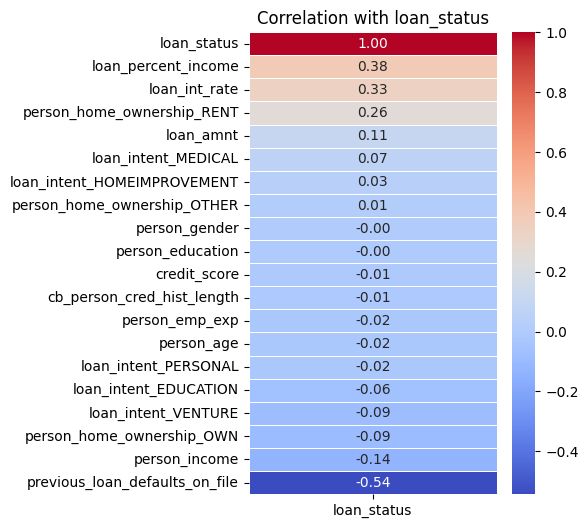

In [30]:
# Extract correlation values with respect to the target variable (loan_status)
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

Insights:

Positive Correlation with loan_status:

loan_percent_income (0.38): This is the strongest positive correlation with loan_status, suggesting that applicants with higher loan amounts relative to their income may have a higher likelihood of approval.

loan_int_rate (0.33): Higher interest rates are positively correlated with approval status, which may indicate that riskier applicants, or those with higher interest rates, are still often approved.

person_home_ownership_RENT (0.26): Renting status has a positive correlation, suggesting that renters might have slightly higher approval rates than other home ownership statuses.

Weak Correlation with loan_status:

loan_amnt (0.11): The loan amount has a weak positive correlation, indicating a slight tendency for higher loan amounts to be approved.

Loan intents like MEDICAL (0.07) and HOMEIMPROVEMENT (0.03) also show weak positive correlations, suggesting some specific loan purposes might influence approval slightly.



In [31]:
# Separate features and target from the train dataset
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

# Display the transformed data
display(X.head())
display(y.head())
df.shape

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,16.02,0.49,3.0,561,0,False,False,True,False,False,False,True,False
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,False,True,False,True,False,False,False,False
2,25.0,0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,False,False,False,False,False,True,False,False
3,23.0,0,3,79753.0,0,35000.0,15.23,0.44,2.0,675,0,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,14.27,0.53,4.0,586,0,False,False,True,False,False,True,False,False


0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

(45000, 20)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

models = {
    'Logistic Regression': Pipeline([
        ('scaler', RobustScaler()),
        ('model', LogisticRegression(random_state=42, class_weight='balanced'))
    ]),
    'Decision Tree': Pipeline([

        ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ]),
    'Random Forest': Pipeline([
        
        ('model', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    ]),
    'Gradient Boosting': Pipeline([
        
        ('model', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    'HistGradient Boosting': Pipeline([
        
        ('model', HistGradientBoostingClassifier(random_state=42))
    ]),
    'Support Vector Machine': Pipeline([
        ('scaler', RobustScaler()),
        ('model', SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced'))
    ]),
    'K-Nearest Neighbors': Pipeline([
        ('scaler', RobustScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])
}



We use the parameter class_weight='balanced' as the dataset contains a class imbalance where there are alot more rejected loans compared to approved loans. We will use pipeline to ensure that all models are consistent when hyper tuning etc. 

Why use RobustScaler?

Our dataset contains data that have extreme outliers. For example, person_income's highest value is more than 7 million. This will skew the mean and min/max of the data. This means that we cannot use StandardScaler and MinMaxScaler. However, having such an outlier will not affect the median, allowing the model to not be influenced by these outliers. Thus, RobustScaler, which centers on median, is the most ordeal.

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6990
           1       0.63      0.91      0.74      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.88      0.82      9000
weighted avg       0.89      0.86      0.87      9000



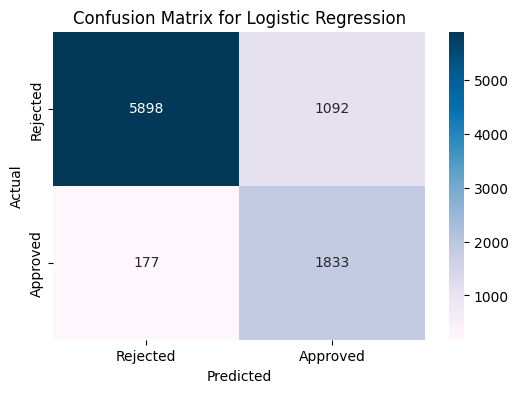



Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6990
           1       0.79      0.78      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



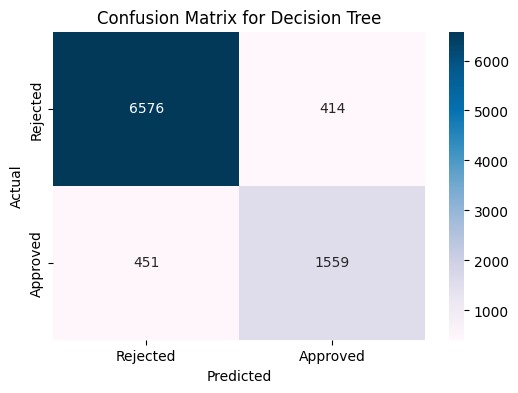



Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6990
           1       0.90      0.76      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



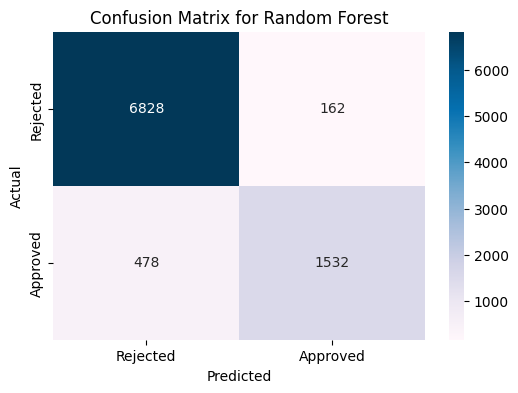



Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



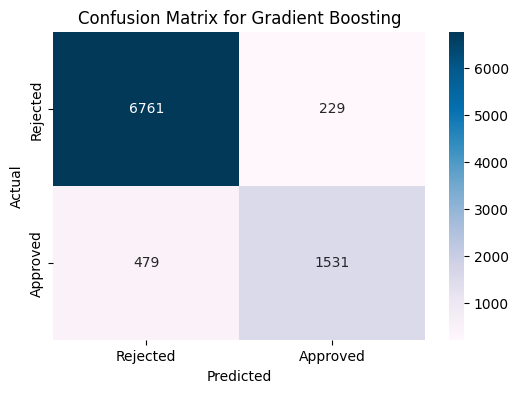



Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.79      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



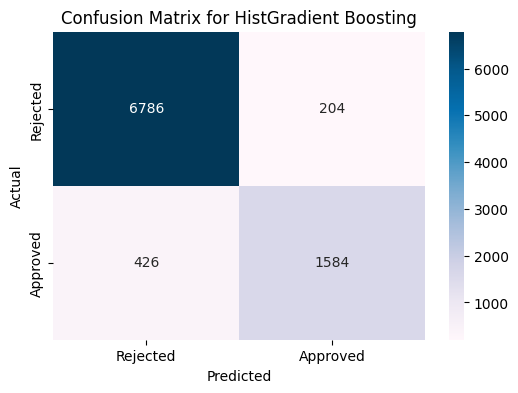



Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6990
           1       0.65      0.93      0.76      2010

    accuracy                           0.87      9000
   macro avg       0.81      0.89      0.84      9000
weighted avg       0.90      0.87      0.88      9000



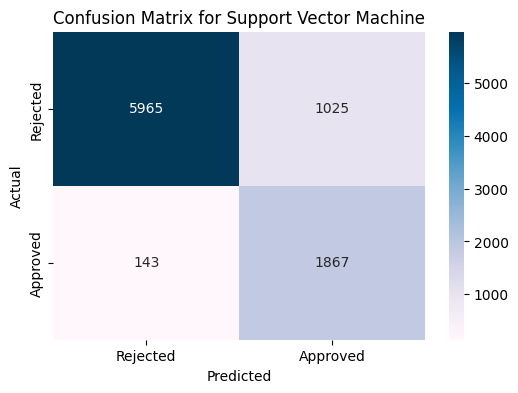



Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6990
           1       0.82      0.72      0.76      2010

    accuracy                           0.90      9000
   macro avg       0.87      0.83      0.85      9000
weighted avg       0.90      0.90      0.90      9000



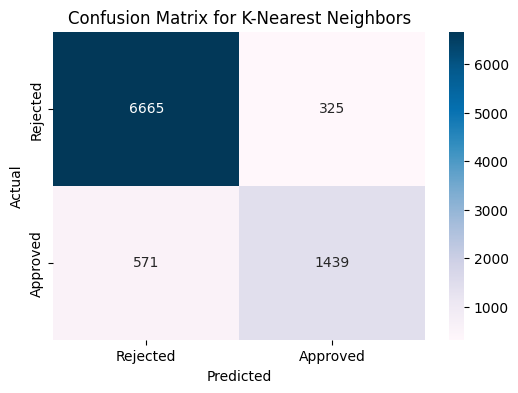



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.857972,0.859000,0.859000
1,Decision Tree,1.000000,0.903889,0.903889
2,Random Forest,1.000000,0.928889,0.928889
3,Gradient Boosting,0.925583,0.921333,0.921333
4,HistGradient Boosting,0.946972,0.930000,0.930000
5,Support Vector Machine,0.876000,0.870222,0.870222
6,K-Nearest Neighbors,0.931500,0.900444,0.900444


In [34]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report




results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_test)


    
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

In [35]:

import pandas as pd

model = models['Random Forest']

# Get importance
importances = model.named_steps['model'].feature_importances_
feature_names = X.columns

# Put into DataFrame for clarity
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

print(importance_df)

                           Feature  Importance
10  previous_loan_defaults_on_file    0.333832
6                    loan_int_rate    0.146796
7              loan_percent_income    0.127715
3                    person_income    0.109674
5                        loan_amnt    0.051266
9                     credit_score    0.046648
13      person_home_ownership_RENT    0.043807
0                       person_age    0.026817
4                   person_emp_exp    0.024046
8       cb_person_cred_hist_length    0.022545
2                 person_education    0.014685
18             loan_intent_VENTURE    0.010543
12       person_home_ownership_OWN    0.010212
1                    person_gender    0.006701
15     loan_intent_HOMEIMPROVEMENT    0.006581
14           loan_intent_EDUCATION    0.006571
16             loan_intent_MEDICAL    0.005779
17            loan_intent_PERSONAL    0.005365
11     person_home_ownership_OTHER    0.000417


In [36]:
org_df= pd.read_csv('loan_data.csv')
print(org_df['loan_intent'].value_counts())
print(org_df['person_home_ownership'].value_counts())

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64


In [37]:
df=df.drop(columns=[
    'person_home_ownership_OTHER',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_EDUCATION',    
    'loan_intent_VENTURE',
    'person_gender'
],axis=1)

X = df.drop(['loan_status'], axis=1)
feature_names = X.columns




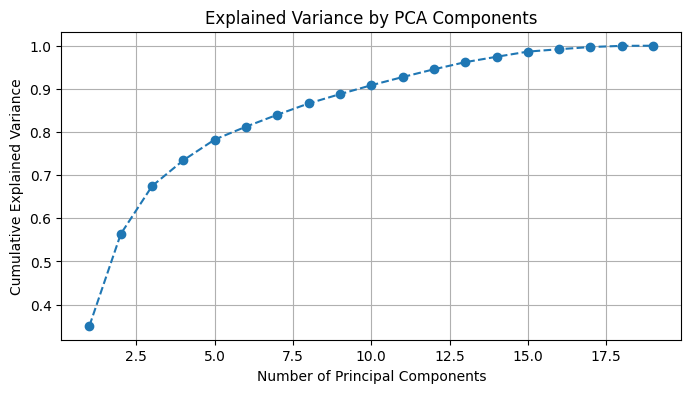

(36000, 19)

In [ ]:
from sklearn.decomposition import PCA
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train) 

pca = PCA()
pca.fit(X_train) 

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()



In [39]:


from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_scaled = scaler.fit_transform(X)


X_df = pd.DataFrame(X_scaled, columns=feature_names)  

vif_data = pd.DataFrame()
vif_data["feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))
high_vif_features = vif_data[vif_data["VIF"] > 5]["feature"].tolist()
print("High VIF Features:", high_vif_features)



                           feature        VIF
0                       person_age  11.913873
3                   person_emp_exp   8.416613
7       cb_person_cred_hist_length   5.094999
4                        loan_amnt   2.384413
6              loan_percent_income   2.366464
11      person_home_ownership_RENT   1.748513
2                    person_income   1.552300
9   previous_loan_defaults_on_file   1.506437
10       person_home_ownership_OWN   1.202630
1                 person_education   1.131563
8                     credit_score   1.081184
5                    loan_int_rate   1.073842
High VIF Features: ['person_age', 'person_emp_exp', 'cb_person_cred_hist_length']


After training the model, and seeing the importance of each feature through VIF, we can see that the column [
    'person_home_ownership_OTHER',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_EDUCATION',
    'loan_intent_VENTURE',
    'person_gender'
] has a very low importance as well as a very low data count in the original dataframe. This means that the columns rarely appears and only adds more noise, so we will drop it. We can also see through the variance graph that past 11 features, the features barely affects the variance and also causes higher dimensionaility.

In [ ]:

from sklearn.compose import ColumnTransformer


X_high_vif = X_df[high_vif_features]    

# 3. Apply PCA (e.g., keep 95% variance)
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_high_vif)


# Create DataFrame for PCA components
X_pca_df = pd.DataFrame(X_pca, columns=[f'PCA_{i+1}' for i in range(X_pca.shape[1])])
X_pca_df



['pca_model.joblib']

In [41]:
# Drop the high-VIF columns from the full dataset
X_remaining = X_df.drop(columns=high_vif_features)

# Combine PCA components with low-VIF features
X_final = pd.concat([X_remaining.reset_index(drop=True), X_pca_df], axis=1)
print(X_train.shape)
print(X_final.shape)


(36000, 19)
(45000, 11)


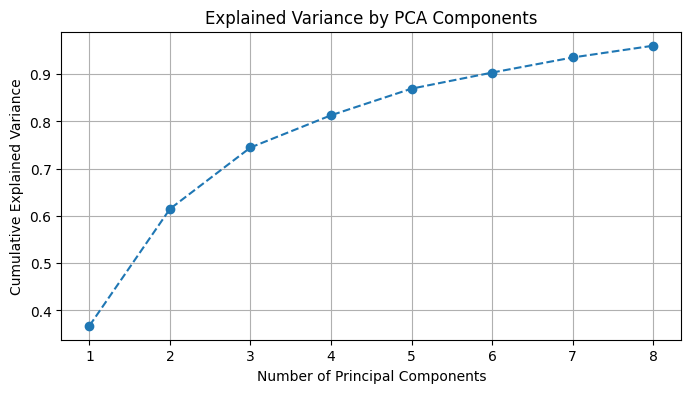

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=0.95, random_state=42)
pca.fit(X_final)  

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

PCA effectively reduced the original 19 features to just 11 principal components while preserving 95% of the data's variance, combining 3 highly correlated features into 2 columns to eliminate redundancy. This compression simplifies the dataset, improving model efficiency and reducing overfitting risks without significant information loss, enabling faster training and clearer interpretation of dominant patterns like financial stability or risk exposure.

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('pca_part', Pipeline([
            ('scaler', RobustScaler()),
            ('pca', PCA(n_components=0.95))
        ]), high_vif_features)
    ],
    remainder=RobustScaler() 
)


We will add preprocessing of PCA into our model's pipeline as to maintain consistency between the data. For example, if PCA was done directly to a dataset, it would need the column values that are being PCA'd to be scaled. When preparing the data to be used by the model, we would have to scale it again. If done incorrectly, it could lead to double scaling and skew results.

# 4. Model training and exporting

In [44]:



models = {
    'Logistic Regression': Pipeline([
        ('preprocess', preprocessor),
        ('model', LogisticRegression(random_state=42, class_weight='balanced'))
    ]),
    
    'Decision Tree': Pipeline([
        ('preprocess', preprocessor),
        ('model', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
    ]),
    
    'Random Forest': Pipeline([
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
    ]),
    
    'Gradient Boosting': Pipeline([
        ('preprocess', preprocessor),
        ('model', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
    ]),
    
    'HistGradient Boosting': Pipeline([
        ('preprocess', preprocessor),
        ('model', HistGradientBoostingClassifier(random_state=42))
    ]),
    
    'Support Vector Machine': Pipeline([
        ('preprocess', preprocessor),
        ('model', SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced'))
    ]),
    
    'K-Nearest Neighbors': Pipeline([
        ('preprocess', preprocessor),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ])
}


['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      6990
           1       0.61      0.92      0.73      2010

    accuracy                           0.85      9000
   macro avg       0.79      0.87      0.82      9000
weighted avg       0.89      0.85      0.86      9000



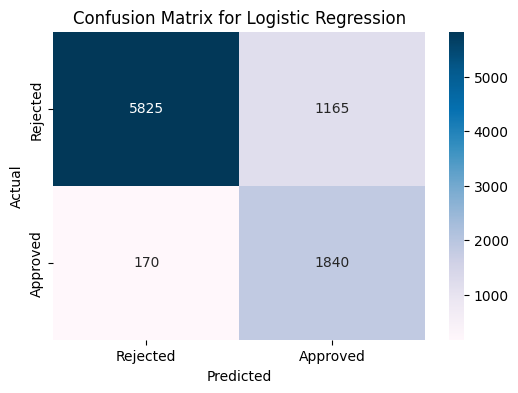



['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6990
           1       0.76      0.74      0.75      2010

    accuracy                           0.89      9000
   macro avg       0.84      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



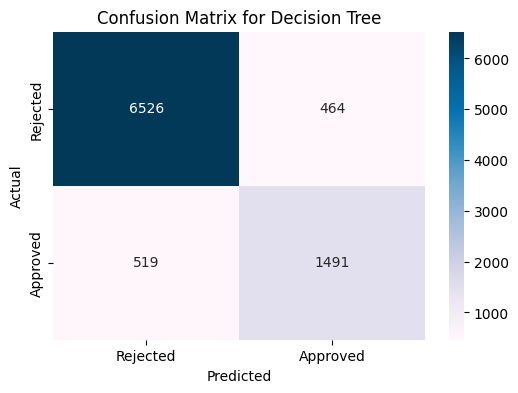



['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.88      0.75      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.91      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



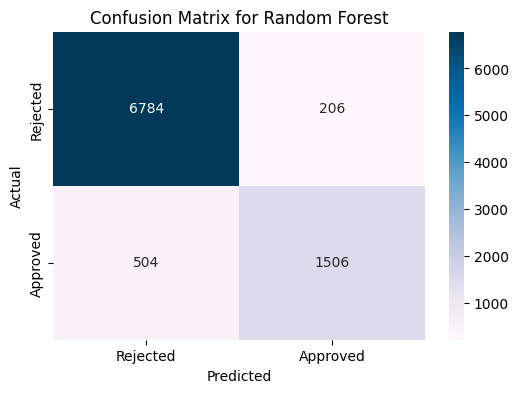



['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.86      0.75      0.80      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.87      9000
weighted avg       0.92      0.92      0.92      9000



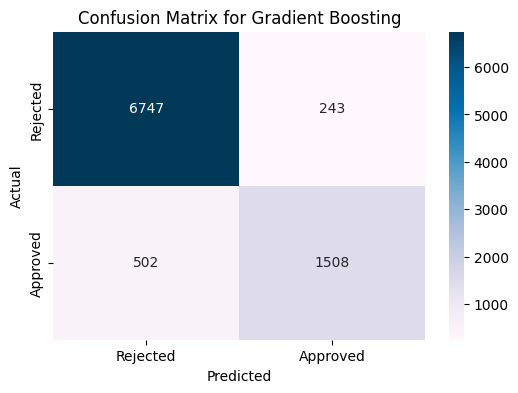



['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for HistGradient Boosting:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.78      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



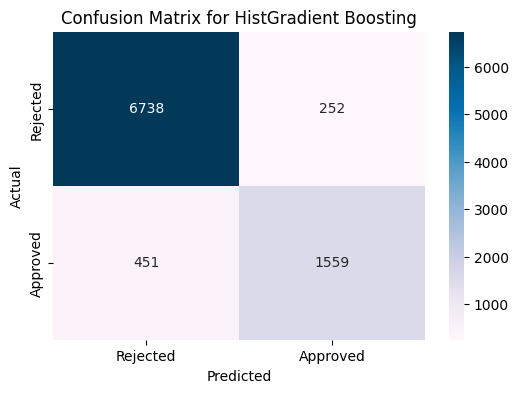



['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      6990
           1       0.62      0.93      0.75      2010

    accuracy                           0.86      9000
   macro avg       0.80      0.89      0.83      9000
weighted avg       0.90      0.86      0.87      9000



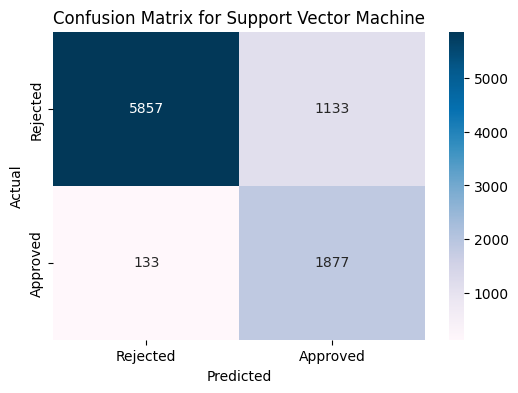



['pca_part__pca0' 'pca_part__pca1' 'remainder__person_education'
 'remainder__person_income' 'remainder__loan_amnt'
 'remainder__loan_int_rate' 'remainder__loan_percent_income'
 'remainder__credit_score' 'remainder__previous_loan_defaults_on_file'
 'remainder__person_home_ownership_OWN'
 'remainder__person_home_ownership_RENT']
Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6990
           1       0.79      0.70      0.74      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.82      0.84      9000
weighted avg       0.89      0.89      0.89      9000



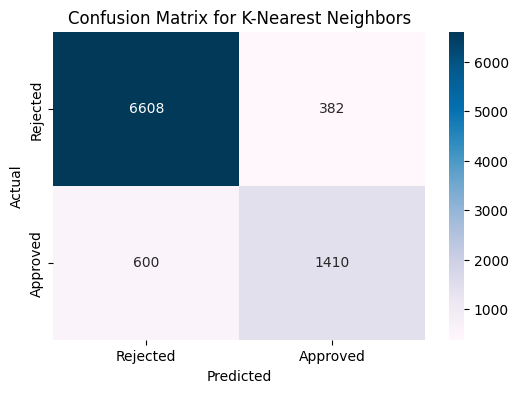



Model Performance Table:


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.852278,0.851667,0.851667
1,Decision Tree,1.000000,0.890778,0.890778
2,Random Forest,1.000000,0.921111,0.921111
3,Gradient Boosting,0.922028,0.917222,0.917222
4,HistGradient Boosting,0.938361,0.921889,0.921889
5,Support Vector Machine,0.859806,0.859333,0.859333
6,K-Nearest Neighbors,0.929083,0.890889,0.890889


In [45]:

X = df.drop(['loan_status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = model.predict(X_test)

    
    print(preprocessor.get_feature_names_out())
    
    # Train and Test Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    # Accuracy Score
    accuracy = accuracy_score(y_test, y_val_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy
    })
    
    # Classification report
    print(f"Classification Report for {name}:\n")
    print(classification_report(y_test, y_val_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_val_pred)
    
    # Plotting confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

# Display the model performance table
print("Model Performance Table:")
display(results_df)

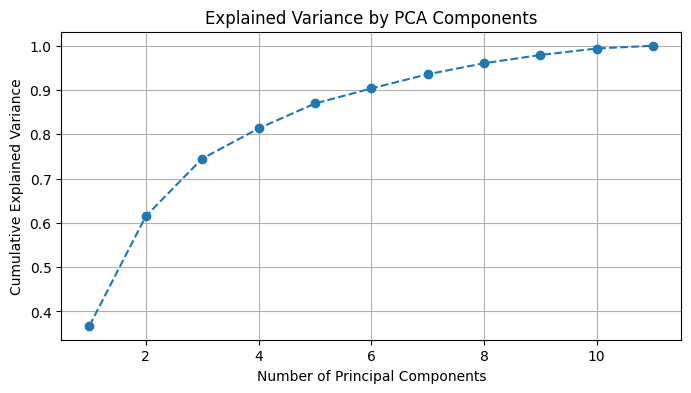

In [46]:
# After fitting PCA
pca = PCA()
pca.fit(X_final)  # X_scaled is your preprocessed data

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Plot it
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [47]:
df.shape

(45000, 13)

PCA and feature pruning helped reduce the dataset’s dimensionality, improve interpretability, and mitigate overfitting, all while maintaining comparable model performance.
The result is a more efficient pipeline that balances accuracy, speed, and simplicity.

In [56]:
from sklearn.model_selection import GridSearchCV



hgb_params = {
    'model__learning_rate': [0.01, 0.1],          # Note: 'model__' prefix
    'model__max_iter': [100, 200],
    'model__max_depth': [None, 5, 10],
    'model__l2_regularization': [0.0, 0.1]
}

hgb_grid = GridSearchCV(
    estimator=models['HistGradient Boosting'],
    param_grid=hgb_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

hgb_grid.fit(X_train, y_train)
hgb_grid.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)



# Classification report
print(f"Classification Report for HistGradientBoosting:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)

print("Best HGB Params:", hgb_grid.best_params_)
print(accuracy)


Classification Report for HistGradientBoosting:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.79      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.92      0.92      0.92      9000

Best HGB Params: {'model__l2_regularization': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': None, 'model__max_iter': 200}
0.9234444444444444


In [ ]:

lr_params = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

lr_grid = GridSearchCV(
    estimator=models['Logistic Regression'],
    param_grid=lr_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_grid.fit(X_train, y_train)
lr_grid.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)



# Classification report
print(f"Classification Report for Logistic Regression:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)
print("Best LR Params:", lr_grid.best_params_)
print(accuracy)



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6990
           1       0.79      0.70      0.74      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.82      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Best LR Params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [ ]:

svc_params = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(
    estimator=models['Support Vector Machine'],
    param_grid=svc_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

svc_grid.fit(X_train, y_train)
svc_grid.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)



# Classification report
print(f"Classification Report for SVC:\n")
print(classification_report(y_test, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_val_pred)
print("Best SVC Params:", svc_grid.best_params_)
print(accuracy)


Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6990
           1       0.79      0.70      0.74      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.82      0.84      9000
weighted avg       0.89      0.89      0.89      9000

Best SVC Params: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}


After tuning the hyperparameters for the three best models that are of different catagories (e.g. tree, linear) we can see that their scores are all around better than without tuning. We are focusing on precision but also don't want the recall to be too low.

In [51]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(

    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('svc', svc_grid.best_estimator_)
    ],
    voting='soft'
)
voting_clf.fit(X_train, y_train)

# Predictions on validation set
y_val_pred = voting_clf.predict(X_test)



# Train and Test Scores
train_score = voting_clf.score(X_train, y_train)
test_score = voting_clf.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)


# Classification report
print(f"Classification Report for Voting Classifier:\n")
print(classification_report(y_test, y_val_pred))


Classification Report for Voting Classifier:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6990
           1       0.74      0.85      0.79      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.88      0.87      9000
weighted avg       0.91      0.90      0.90      9000



In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Assuming these are already tuned:
# hgb_grid, lr_grid, svc_grid (with SVC(probability=True))

stacking_clf = StackingClassifier(
    estimators=[
        ('hgb', hgb_grid.best_estimator_),
        ('lr', lr_grid.best_estimator_),
        ('svc', svc_grid.best_estimator_)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1,
    passthrough=False,  # set to True if you want original features + base predictions
    stack_method='auto'  # usually 'predict_proba' if soft outputs exist
)

stacking_clf.fit(X_train, y_train)


# Predictions on validation set
y_val_pred = stacking_clf.predict(X_test)



# Train and Test Scores
train_score = stacking_clf.score(X_train, y_train)
test_score = stacking_clf.score(X_test, y_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_val_pred)


# Classification report
print(f"Classification Report for Stacking Classifier:\n")
print(classification_report(y_test, y_val_pred))
print(accuracy)

Classification Report for Stacking Classifier:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6990
           1       0.86      0.79      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.88      0.89      9000
weighted avg       0.92      0.92      0.92      9000

0.9234444444444444


Putting three of the best distinct models through ensemble learning models so that it can leverage the strengths of different models to improve overall accuracy and robustness. 

The reason why we use three different models of different types is because it allows the models to leverage each of the different model strengths instead of only using similar models. Also allows for errors to be corrected as they are different for every model type. We can see that stacking classifier performs better than all our single models and the voting classifier, so we will be using this model as the final model for inference. The metric is based on precision. Since this is a loan acceptance predictor, we will want to ensure that the out of all accepted loans, there is a high percentage of these loans being correctly accepted. And also ensure that the recall is not too low, this model has the best balance.



In [53]:


# Wrap the fitted StackingClassifier in a pipeline (even if just for consistency)
full_pipeline = Pipeline([
    ('stacking', stacking_clf)  # stacker is your fitted StackingClassifier
])

full_pipeline.fit(X_train, y_train)
# Export the pipeline
dump(full_pipeline, 'stacking_pipeline.joblib')
dump(feature_names,'kept_columns.joblib')


['kept_columns.joblib']